<a href="https://colab.research.google.com/github/iam5678/1-/blob/main/%EC%B6%98%EC%B2%9C%EC%8B%9C%EB%B2%84%EC%8A%A4%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 데이터분석 프로젝트_202213799_오준석

## 1. 개요
저는 춘천시 버스 탑승자들의 데이터를 다각도로 분석하는 데이터 분석 프로젝트를 준비했습니다.
이를 위해 공공데이터포털에서 제공하는 [강원도 춘천시_정류장별 버스민원통합데이터](https://www.data.go.kr/data/15110799/fileData.do)를 사용하여 성별, 나이대, 버스이용목적 등을 이용하여 분석을 하고 seaborn을 이용하여 시각화를 했습니다.



## 2. 사용한 데이터
저는 공공데이터포털에서 [강원도 춘천시_정류장별 버스민원통합데이터](https://www.data.go.kr/data/15110799/fileData.do)를 다운로드받아 사용했습니다. 데이터에 대해 제공되는 기본적인 설명은 다음과 같습니다.

---
2022년도 공공데이터 기업매칭 사업을 통해 구축된 춘천시 시내버스 이용객으로부터 취합한 정류장별 버스민원 통합 데이터로 설문번호, 응답자나이대, 응답자성별, 응답자주소, 출발장소, 도착장소, 환승횟수, 서비스만족도, 배차간격, 정류장만족도, 기타특이사항, 등록일시, 등록자아이디, 데이터기준일로 구성되어 있음.


In [44]:
import pandas as pd
import numpy as np
import seaborn as sns

In [45]:
file_path = '/content/bus_data_chuncheon.csv'
df = pd.read_csv(file_path, encoding='CP949')
df


,설문번호,응답자_나이대,응답자_성별,응답자_주소,버스노선번호,버스이용목적,버스이용주기,버스노선만족도,운전자서비스만족도,기타_특이사항,등록일시,등록자_아이디,데이터기준일
0,43,60대이상,여자,교동,2+100+300,장보기,주 1~2회,만족,불만족,기사분들이 불친절하고 타지인들에게 설명 부족함,2022-07-04 08:16:09,wogns0944,2022-12-15
1,44,50대,여자,교동,2,출퇴근,주 1~2회,만족,만족,버스 내부가 미끄러워 의자에서 넘어짐,2022-07-04 08:25:05,wogns0944,2022-12-15
2,45,40대,남자,후평3동,모름,귀가,주 1~2회,매우 만족,매우 만족,스마트 버스정류장이 많이 필요하고 우천 시에 필요한 정류장 환경 구축해야함,2022-07-04 08:32:26,wogns0944,2022-12-15
3,46,60대이상,여자,교동,2+10-1+12,수영장방문,매일,만족,만족,없음,2022-07-04 08:50:53,wogns0944,2022-12-15
4,47,60대이상,여자,후평2동,3,물품구입,주 1~2회,보통,보통,환승시간이 짧음,2022-07-04 08:57:23,wogns0944,2022-12-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3522,40대,여자,강남동,11,교통수단,주 3~5회,보통,불만족,버스 문이 고장 난 버스를 몰고 다니시는 기사분이 계셨음,2022-08-03 15:40:34,admin2,2022-12-15
2996,3524,10대,남자,석사동,300,귀가,주 1~2회,불만족,만족,없음,2022-08-03 15:44:21,admin10,2022-12-15
2997,3525,60대이상,여자,신사우동,200-1,개인업무,주 1~2회,보통,불만족,기사분 주행이 불만족스럽고 스마트 정류장 증설 바람,2022-08-03 15:45:04,admin9,2022-12-15
2998,3526,60대이상,여자,강남동,5,귀가,주 3~5회,만족,만족,오후 3시에서 4시 사이 칠전동 가는 버스가 많았으면 좋겠음,2022-08-03 15:47:05,admin8,2022-12-15


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   설문번호       3000 non-null   int64 
 1   응답자_나이대    3000 non-null   object
 2   응답자_성별     3000 non-null   object
 3   응답자_주소     3000 non-null   object
 4   버스노선번호     3000 non-null   object
 5   버스이용목적     3000 non-null   object
 6   버스이용주기     3000 non-null   object
 7   버스노선만족도    3000 non-null   object
 8   운전자서비스만족도  3000 non-null   object
 9   기타_특이사항    3000 non-null   object
 10  등록일시       3000 non-null   object
 11  등록자_아이디    3000 non-null   object
 12  데이터기준일     3000 non-null   object
dtypes: int64(1), object(12)
memory usage: 304.8+ KB


In [47]:
df.dtypes

설문번호          int64
응답자_나이대      object
응답자_성별       object
응답자_주소       object
버스노선번호       object
버스이용목적       object
버스이용주기       object
버스노선만족도      object
운전자서비스만족도    object
기타_특이사항      object
등록일시         object
등록자_아이디      object
데이터기준일       object
dtype: object

In [48]:
df.head()

,설문번호,응답자_나이대,응답자_성별,응답자_주소,버스노선번호,버스이용목적,버스이용주기,버스노선만족도,운전자서비스만족도,기타_특이사항,등록일시,등록자_아이디,데이터기준일
0,43,60대이상,여자,교동,2+100+300,장보기,주 1~2회,만족,불만족,기사분들이 불친절하고 타지인들에게 설명 부족함,2022-07-04 08:16:09,wogns0944,2022-12-15
1,44,50대,여자,교동,2,출퇴근,주 1~2회,만족,만족,버스 내부가 미끄러워 의자에서 넘어짐,2022-07-04 08:25:05,wogns0944,2022-12-15
2,45,40대,남자,후평3동,모름,귀가,주 1~2회,매우 만족,매우 만족,스마트 버스정류장이 많이 필요하고 우천 시에 필요한 정류장 환경 구축해야함,2022-07-04 08:32:26,wogns0944,2022-12-15
3,46,60대이상,여자,교동,2+10-1+12,수영장방문,매일,만족,만족,없음,2022-07-04 08:50:53,wogns0944,2022-12-15
4,47,60대이상,여자,후평2동,3,물품구입,주 1~2회,보통,보통,환승시간이 짧음,2022-07-04 08:57:23,wogns0944,2022-12-15


## 3. 데이터 클린징

* 결측치 확인결과 결측치는 없었고
* 설문번호, 등록일시, 등록자 아이디, 데이터 기준일은 필요없는 열이므로 제거합니다.

In [49]:
df.count()

설문번호         3000
응답자_나이대      3000
응답자_성별       3000
응답자_주소       3000
버스노선번호       3000
버스이용목적       3000
버스이용주기       3000
버스노선만족도      3000
운전자서비스만족도    3000
기타_특이사항      3000
등록일시         3000
등록자_아이디      3000
데이터기준일       3000
dtype: int64

In [50]:
df.isnull().sum()

설문번호         0
응답자_나이대      0
응답자_성별       0
응답자_주소       0
버스노선번호       0
버스이용목적       0
버스이용주기       0
버스노선만족도      0
운전자서비스만족도    0
기타_특이사항      0
등록일시         0
등록자_아이디      0
데이터기준일       0
dtype: int64

In [51]:
df = df.drop(['설문번호', '등록일시', '등록자_아이디', '데이터기준일'], axis = 1)
df

,응답자_나이대,응답자_성별,응답자_주소,버스노선번호,버스이용목적,버스이용주기,버스노선만족도,운전자서비스만족도,기타_특이사항
0,60대이상,여자,교동,2+100+300,장보기,주 1~2회,만족,불만족,기사분들이 불친절하고 타지인들에게 설명 부족함
1,50대,여자,교동,2,출퇴근,주 1~2회,만족,만족,버스 내부가 미끄러워 의자에서 넘어짐
2,40대,남자,후평3동,모름,귀가,주 1~2회,매우 만족,매우 만족,스마트 버스정류장이 많이 필요하고 우천 시에 필요한 정류장 환경 구축해야함
3,60대이상,여자,교동,2+10-1+12,수영장방문,매일,만족,만족,없음
4,60대이상,여자,후평2동,3,물품구입,주 1~2회,보통,보통,환승시간이 짧음
...,...,...,...,...,...,...,...,...,...
2995,40대,여자,강남동,11,교통수단,주 3~5회,보통,불만족,버스 문이 고장 난 버스를 몰고 다니시는 기사분이 계셨음
2996,10대,남자,석사동,300,귀가,주 1~2회,불만족,만족,없음
2997,60대이상,여자,신사우동,200-1,개인업무,주 1~2회,보통,불만족,기사분 주행이 불만족스럽고 스마트 정류장 증설 바람
2998,60대이상,여자,강남동,5,귀가,주 3~5회,만족,만족,오후 3시에서 4시 사이 칠전동 가는 버스가 많았으면 좋겠음


## 4. 데이터탐색


In [52]:
df['응답자_나이대'].value_counts()

60대이상    1497
20대       627
10대       369
50대       284
40대       128
30대        95
Name: 응답자_나이대, dtype: int64

In [53]:
df['응답자_주소'].value_counts()

퇴계동     416
신사우동    398
석사동     232
강남동     221
후평2동    215
후평1동    178
동면      173
신북읍     168
후평3동    162
동내면      90
교동       88
서면       85
소양동      84
효자2동     78
근화동      59
효자1동     52
효자3동     49
사북면      47
남산면      44
신동면      37
남면       35
약사명동     32
동산면      19
조운동      19
북산면      19
Name: 응답자_주소, dtype: int64

In [54]:
#여러 조건에 의한 버스노선만족도와 운전자서비스만족도를 데이터프레임으로 계산하기 위해
#매우 만족부터 매우 불만족까지 각각 10에서 2까지 2씩 차이가 나도록 하여 숫자형으로 변환한다.
df = df.replace(['매우 만족', '만족', '보통', '불만족', '매우 불만족'], np.array([10, 8, 6, 4, 2]))
df['버스노선만족도'].value_counts()
df['버스노선만족도'] = df['버스노선만족도'].astype(int)
df.dtypes


응답자_나이대      object
응답자_성별       object
응답자_주소       object
버스노선번호       object
버스이용목적       object
버스이용주기       object
버스노선만족도       int64
운전자서비스만족도     int64
기타_특이사항      object
dtype: object

In [55]:
df3 = df[df['버스이용목적'].isin(df['버스이용목적'].value_counts().head(10).index)]

In [56]:
df['버스이용주기'].value_counts()

주 3~5회      1212
주 1~2회       734
매일           620
달 1~3회       278
거의 이용 안함     156
Name: 버스이용주기, dtype: int64

In [57]:
df1 = df.groupby(['응답자_성별', '응답자_나이대'])['버스노선만족도', '운전자서비스만족도'].mean()
df1

버스노선만족도  운전자서비스만족도
응답자_성별 응답자_나이대                     
남자     10대      6.835443   6.974684
       20대      6.358566   7.091633
       30대      6.050000   6.500000
       40대      6.333333   6.666667
       50대      5.773585   6.716981
       60대이상    5.159269   6.219321
여자     10대      6.312796   6.966825
       20대      5.973404   7.085106
       30대      5.927273   6.727273
       40대      5.461538   6.442308
       50대      5.324675   5.982684
       60대이상    5.111311   6.096948

In [58]:
df2 = df.groupby(['버스이용주기'])['버스노선만족도', '운전자서비스만족도'].mean()
df2

,버스노선만족도,운전자서비스만족도
버스이용주기,,
거의 이용 안함,5.730769,6.551282
달 1~3회,5.942446,6.726619
매일,5.532258,6.316129
주 1~2회,5.746594,6.621253
주 3~5회,5.407591,6.369637


## 5. 데이터 시각화


In [59]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 27 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

<Axes: xlabel='응답자_나이대', ylabel='버스노선만족도'>

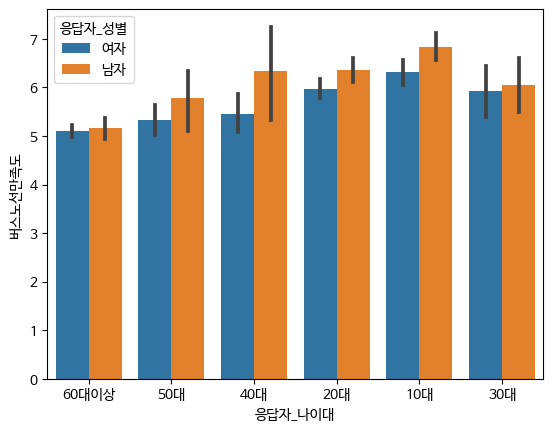

In [60]:
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings(action = 'ignore')
%matplotlib inline
plt.rcParams['axes.unicode_minus'] = False
plt.rc('font', family = 'NanumBarunGothic')


sns.barplot(x='응답자_나이대', y = '버스노선만족도', data = df, hue = '응답자_성별')

<Axes: xlabel='응답자_나이대', ylabel='운전자서비스만족도'>

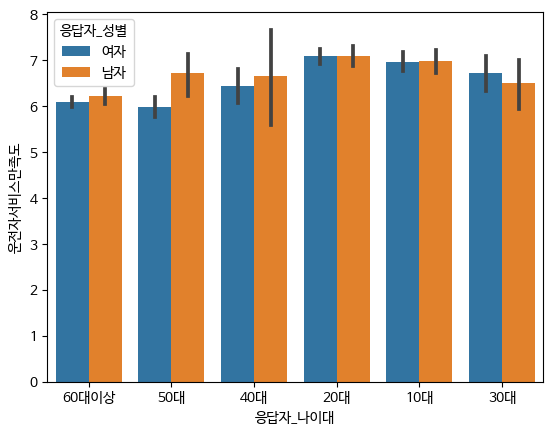

In [61]:
sns.barplot(x='응답자_나이대', y = '운전자서비스만족도', data = df, hue = '응답자_성별')

<Axes: xlabel='응답자_성별', ylabel='버스노선만족도'>

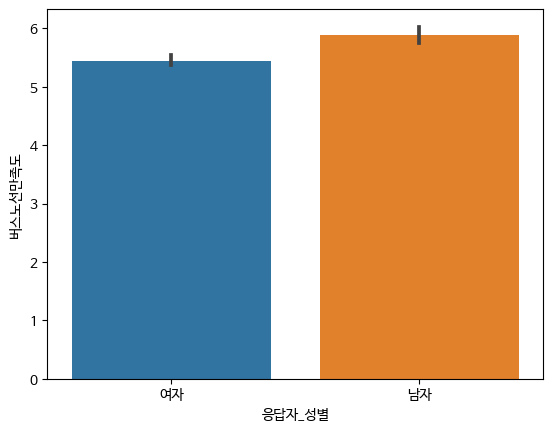

In [62]:
sns.barplot(x='응답자_성별', y = '버스노선만족도', data = df)

<Axes: xlabel='응답자_성별', ylabel='운전자서비스만족도'>

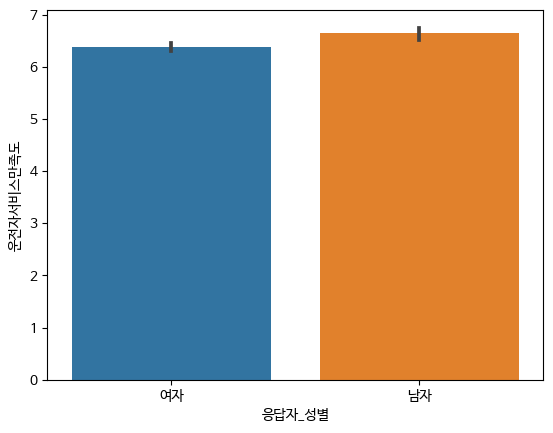

In [63]:
sns.barplot(x='응답자_성별', y = '운전자서비스만족도', data = df)

<Axes: xlabel='버스이용목적', ylabel='버스노선만족도'>

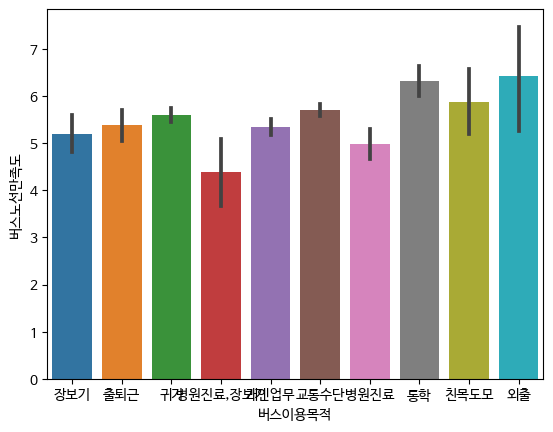

In [64]:
sns.barplot(x='버스이용목적', y = '버스노선만족도', data = df3)

<Axes: xlabel='버스이용목적', ylabel='운전자서비스만족도'>

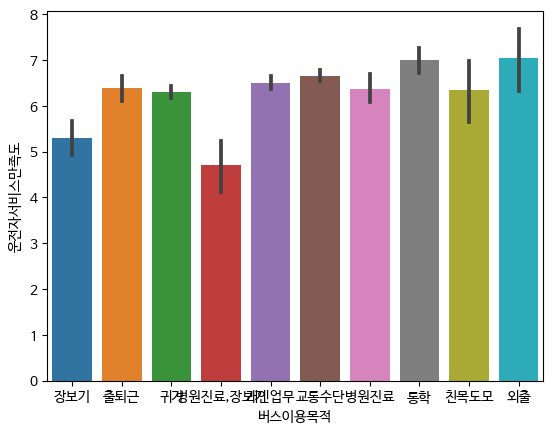

In [65]:
sns.barplot(x='버스이용목적', y = '운전자서비스만족도', data = df3)

<Axes: xlabel='버스이용주기', ylabel='버스노선만족도'>

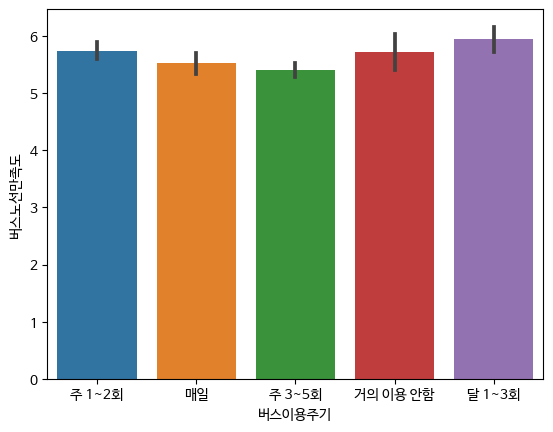

In [66]:
sns.barplot(x = '버스이용주기', y = '버스노선만족도', data = df)

<Axes: xlabel='버스이용주기', ylabel='운전자서비스만족도'>

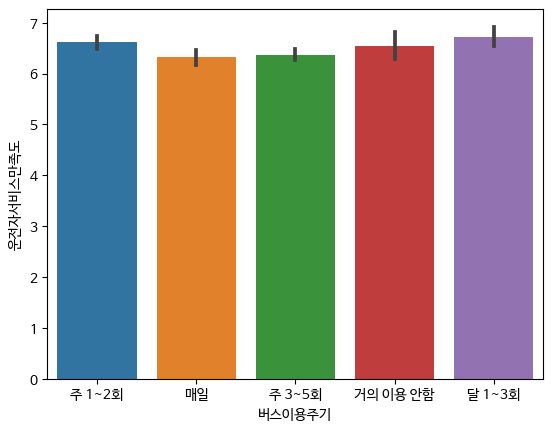

In [67]:
sns.barplot(x = '버스이용주기', y = '운전자서비스만족도', data = df)

## 6. 결론

데이터 분석 결과, 다음과 같은 사실을 알 수 있었습니다.

* 버스노선만족도와 운전자서비스만족도는 비슷한 양상을 보임
* 남자가 여자보다 평균적으로 만족도가 높음
* 이용주기의 길고 짧음에 만족도는 큰 영향을 주지않음